In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd

# Define the path to the uploaded file
file_path = '/content/drive/MyDrive/WVUResearch/updated_data.csv'
df = pd.read_csv(file_path)
df

,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips,Region
0,2018,0R01-00311,Ketchum,ID,All,Rural Reporter,2722290.0,35.0,851065.0,536583.0,Mountain
1,2018,0R01-00341,Ponderay,ID,All,Rural Reporter,516231.0,8.0,167051.0,69822.0,Mountain
2,2018,0R01-00347,Lewiston,ID,All,Rural Reporter,590539.0,10.0,84099.0,161322.0,Mountain
3,2018,0R01-00357,Twin Falls,ID,All,Rural Reporter,545266.0,12.0,87298.0,19938.0,Mountain
4,2018,0R01-00403,Salmon,ID,All,Rural Reporter,156627.0,4.0,32097.0,16747.0,Mountain
...,...,...,...,...,...,...,...,...,...,...,...
5270,2022,9R04-91107,Laughlin,NV,All,Rural Reporter,1115748.0,15.0,241989.0,77434.0,Mountain
5271,2022,9R04-91113,Yerington,NV,All,Rural Reporter,192122.0,12.0,56906.0,5177.0,Mountain
5272,2022,9R04-99430,Pahrump,NV,All,Rural Reporter,566863.0,13.0,258508.0,30292.0,Mountain
5273,2022,9R05-90999,Upper Tumon,GU,All,Rural Reporter,2026980.0,29.0,445097.0,24554.0,Pacific


In [12]:
len(df['SubRecipientCode'].unique()) ,  len(df['State'].unique())

(1055, 51)

In [13]:
# Re-generating the table with state-wise summary statistics
summary = df.groupby('State').agg(
    No_of_agencies=('SubRecipientCode', 'nunique'),
    Mean_Total_Operating_Expense=('Total Operating Expense', 'mean'),
    Std_Total_Operating_Expense=('Total Operating Expense', 'std'),
    Mean_Total_Active_Revenue_Vehicles=('Total Active Revenue Vehicles', 'mean'),
    Std_Total_Active_Revenue_Vehicles=('Total Active Revenue Vehicles', 'std'),
    Mean_Annual_Vehicle_Revenue_Miles=('Annual Vehicle Revenue Miles', 'mean'),
    Std_Annual_Vehicle_Revenue_Miles=('Annual Vehicle Revenue Miles', 'std'),
    Mean_Total_Unlinked_Passenger_Trips=('Total Unlinked Passenger Trips', 'mean'),
    Std_Total_Unlinked_Passenger_Trips=('Total Unlinked Passenger Trips', 'std')
).reset_index()

# Rounding all numeric columns to two decimal points
summary = summary.round(2)
summary

,State,No_of_agencies,Mean_Total_Operating_Expense,Std_Total_Operating_Expense,Mean_Total_Active_Revenue_Vehicles,Std_Total_Active_Revenue_Vehicles,Mean_Annual_Vehicle_Revenue_Miles,Std_Annual_Vehicle_Revenue_Miles,Mean_Total_Unlinked_Passenger_Trips,Std_Total_Unlinked_Passenger_Trips
0,AK,10,1802396.46,2033002.62,12.72,11.14,222255.94,240586.96,134679.08,258733.54
1,AL,20,487720.93,454848.42,12.09,11.20,150531.31,165954.83,41012.82,94081.49
2,AR,8,2968295.42,3734899.00,63.25,71.30,1407157.82,1776053.00,171426.62,204580.41
3,AS,1,757377.80,280166.41,8.80,1.10,166741.60,29690.33,26397.60,4019.53
4,AZ,13,683868.03,495370.24,8.88,4.34,168575.43,118763.73,53904.06,57036.52
5,CA,48,1744914.13,1998960.32,16.05,19.35,307255.13,400265.14,96405.02,154959.72
6,CO,29,3061307.97,7243003.23,24.57,40.92,561870.63,1083683.23,448557.87,921082.80
7,CT,2,893503.90,274518.90,14.00,4.69,218909.80,77676.20,44055.00,16530.41
8,FL,18,1699690.73,1158852.44,31.66,17.73,536814.14,336136.38,95796.98,117991.80
9,GA,58,429392.24,866195.58,6.38,11.45,180789.01,384599.25,25621.17,56204.27


In [14]:
# Grouping by 'Year' and calculating min, max, mean, and std for each variable
df_summary = df.groupby('Year').agg({
    'Total Operating Expense': ['min', 'max', 'mean', 'std'],
    'Total Active Revenue Vehicles': ['min', 'max', 'mean', 'std'],
    'Annual Vehicle Revenue Miles': ['min', 'max', 'mean', 'std'],
    'Total Unlinked Passenger Trips': ['min', 'max', 'mean', 'std']
}).reset_index()

# Display the summary
df_summary


Year Total Operating Expense                                          \
                            min         max          mean           std   
0  2018                  7270.0  32342251.0  1.207626e+06  2.092278e+06   
1  2019                  6643.0  34825962.0  1.256140e+06  2.148761e+06   
2  2020                  9436.0  37471304.0  1.249261e+06  2.203797e+06   
3  2021                  5878.0  41892857.0  1.272282e+06  2.254691e+06   
4  2022                  6506.0  46190159.0  1.413361e+06  2.504961e+06   

  Total Active Revenue Vehicles                               \
                            min    max       mean        std   
0                           1.0  853.0  19.999052  36.206437   
1                           1.0  878.0  20.292891  37.403519   
2                           1.0  846.0  20.451185  36.839119   
3                           1.0  818.0  20.507109  36.893067   
4                           1.0  794.0  19.828436  34.506221   

  Annual Vehicle Revenue Miles                                            \
                           min         max           mean            std   
0                       2501.0  15650547.0  416094.812322  779855.405131   
1                       3518.0  14653297.0  410885.292891  748331.300218   
2                       1289.0  10474862.0  342422.666351  605339.643050   
3                       2207.0  10308874.0  312579.551659  554941.178554   
4                       2707.0   8460420.0  342051.953555  561600.662380   

  Total Unlinked Passenger Trips                                           
                             min        max           mean            std  
0                           75.0  4986079.0  119506.609479  291500.059434  
1                          113.0  5230352.0  120388.147867  299618.434338  
2                          105.0  2556605.0   86680.072986  204367.966891  
3                           95.0  3027511.0   63711.862559  171403.227259  
4                          110.0  4021065.0   81707.609479  220766.849677

In [15]:
# Grouping by 'State' and 'Year' to calculate the statistics for the specified variables
state_yearly_stats = df.groupby(['State', 'Year']).agg({
    'Total Operating Expense': ['mean', 'min', 'max', 'std'],
    'Total Active Revenue Vehicles': ['mean', 'min', 'max', 'std'],
    'Annual Vehicle Revenue Miles': ['mean', 'min', 'max', 'std'],
    'Total Unlinked Passenger Trips': ['mean', 'min', 'max', 'std']
}).reset_index()
state_yearly_stats

State  Year Total Operating Expense                                     \
                                   mean       min        max           std   
0      AK  2018            1.685612e+06  135933.0  6514633.0  2.064448e+06   
1      AK  2019            1.716644e+06  198935.0  6596166.0  2.070552e+06   
2      AK  2020            1.693060e+06  142876.0  6560954.0  2.018127e+06   
3      AK  2021            1.884437e+06  265991.0  6746049.0  2.087141e+06   
4      AK  2022            2.032228e+06  201079.0  6883669.0  2.328418e+06   
..    ...   ...                     ...       ...        ...           ...   
250    WY  2018            6.119403e+05   94493.0  3695843.0  9.514901e+05   
251    WY  2019            6.365867e+05  119324.0  3987766.0  1.012241e+06   
252    WY  2020            6.209611e+05   66481.0  3995048.0  1.033072e+06   
253    WY  2021            6.173258e+05   97621.0  3758940.0  9.707117e+05   
254    WY  2022            7.769119e+05  127949.0  5175474.0  1.302868e+06   

    Total Active Revenue Vehicles                        \
                             mean  min   max        std   
0                         12.8000  2.0  35.0  12.081207   
1                         13.4000  2.0  35.0  12.790622   
2                         12.7000  2.0  35.0  11.566715   
3                         12.8000  1.0  30.0  11.321563   
4                         11.9000  2.0  28.0  10.170218   
..                            ...  ...   ...        ...   
250                       10.5000  3.0  40.0  10.564090   
251                       11.3125  3.0  40.0  10.675322   
252                       11.1250  3.0  43.0  10.849731   
253                       11.3750  3.0  44.0  11.505796   
254                       10.2500  3.0  33.0   9.553359   

    Annual Vehicle Revenue Miles                                    \
                            mean      min       max            std   
0                    241414.2000  27588.0  871092.0  268228.868473   
1                    228051.7000  27010.0  855834.0  261922.496354   
2                    224233.3000  17648.0  789677.0  253753.707916   
3                    208648.8000   8174.0  725679.0  239057.383093   
4                    208931.7000  13979.0  669175.0  228459.650138   
..                           ...      ...       ...            ...   
250                  161603.3750  27390.0  875940.0  221725.038949   
251                  163722.8750  26953.0  892894.0  225363.866378   
252                  118841.8125  22251.0  704560.0  171190.553414   
253                  128996.0000  19002.0  821205.0  203398.288580   
254                  142949.4375  16682.0  917582.0  228057.089490   

    Total Unlinked Passenger Trips                                    
                              mean     min        max            std  
0                      177259.9000  8772.0  1068131.0  334448.796675  
1                      179462.7000  7875.0  1070381.0  336837.033904  
2                      141260.3000  5279.0   838763.0  262459.721750  
3                       76164.6000  1247.0   502231.0  153930.264341  
4                       99247.9000  2629.0   627712.0  192568.165198  
..                             ...     ...        ...            ...  
250                    126956.6875  8008.0  1063836.0  295046.431956  
251                    127340.3125  8330.0  1103468.0  301084.447999  
252                     81746.5625  5490.0   729239.0  193242.878121  
253                     49710.7500  4759.0   479160.0  118646.016062  
254                     73790.0000  5595.0   696867.0  177685.053278  

[255 rows x 18 columns]

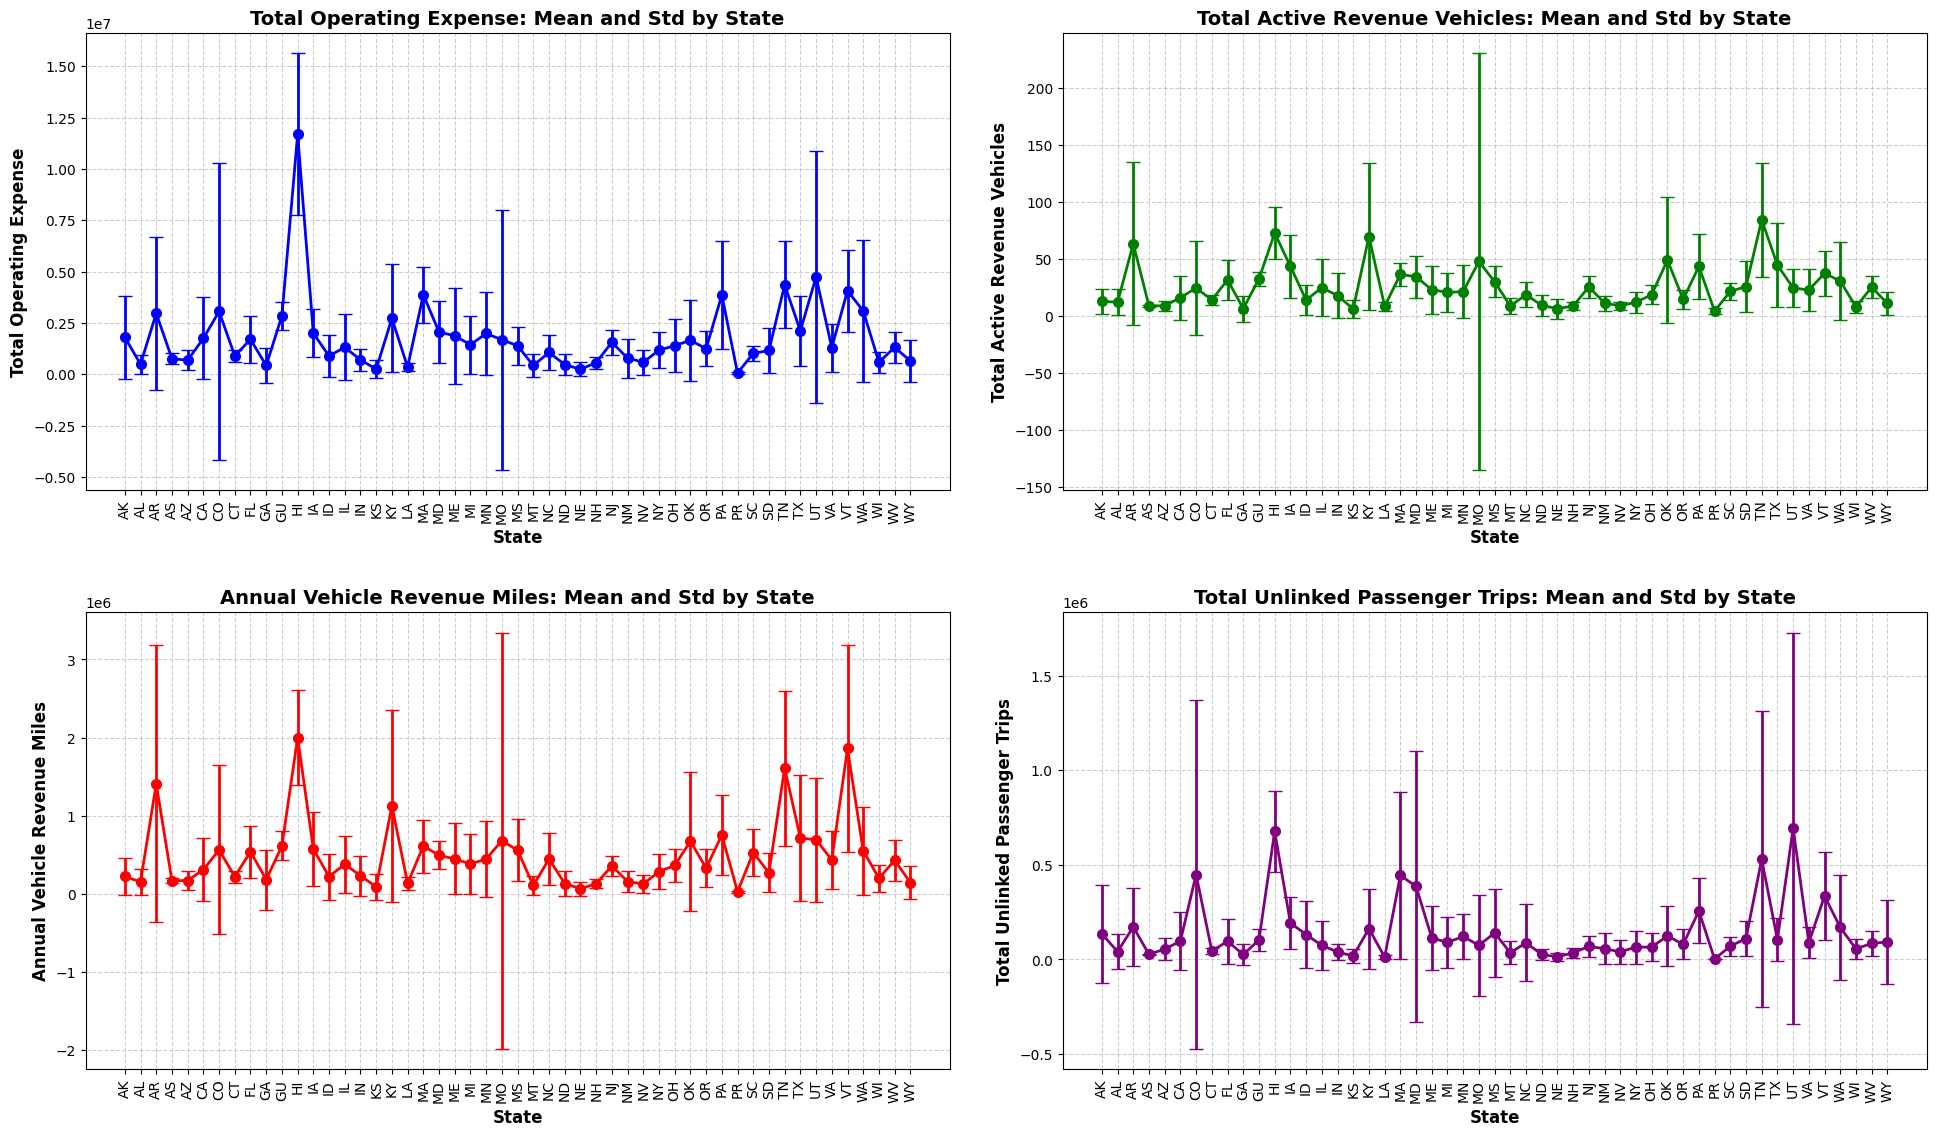

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the mean and std for the states data with improvements
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plotting Mean and Std for Total Operating Expense by State
axs[0, 0].errorbar(summary['State'], summary['Mean_Total_Operating_Expense'],
                   yerr=summary['Std_Total_Operating_Expense'], fmt='o-', capsize=5, markersize=7, linewidth=2, color='blue')
axs[0, 0].set_title('Total Operating Expense: Mean and Std by State', fontweight='bold', fontsize=14)
axs[0, 0].set_xlabel('State', fontweight='bold', fontsize=12)
axs[0, 0].set_ylabel('Total Operating Expense', fontweight='bold', fontsize=12)
axs[0, 0].grid(True, linestyle='--', alpha=0.6)
axs[0, 0].tick_params(axis='x', rotation=90)

# Plotting Mean and Std for Total Active Revenue Vehicles by State
axs[0, 1].errorbar(summary['State'], summary['Mean_Total_Active_Revenue_Vehicles'],
                   yerr=summary['Std_Total_Active_Revenue_Vehicles'], fmt='o-', capsize=5, markersize=7, linewidth=2, color='green')
axs[0, 1].set_title('Total Active Revenue Vehicles: Mean and Std by State', fontweight='bold', fontsize=14)
axs[0, 1].set_xlabel('State', fontweight='bold', fontsize=12)
axs[0, 1].set_ylabel('Total Active Revenue Vehicles', fontweight='bold', fontsize=12)
axs[0, 1].grid(True, linestyle='--', alpha=0.6)
axs[0, 1].tick_params(axis='x', rotation=90)

# Plotting Mean and Std for Annual Vehicle Revenue Miles by State
axs[1, 0].errorbar(summary['State'], summary['Mean_Annual_Vehicle_Revenue_Miles'],
                   yerr=summary['Std_Annual_Vehicle_Revenue_Miles'], fmt='o-', capsize=5, markersize=7, linewidth=2, color='red')
axs[1, 0].set_title('Annual Vehicle Revenue Miles: Mean and Std by State', fontweight='bold', fontsize=14)
axs[1, 0].set_xlabel('State', fontweight='bold', fontsize=12)
axs[1, 0].set_ylabel('Annual Vehicle Revenue Miles', fontweight='bold', fontsize=12)
axs[1, 0].grid(True, linestyle='--', alpha=0.6)
axs[1, 0].tick_params(axis='x', rotation=90)

# Plotting Mean and Std for Total Unlinked Passenger Trips by State
axs[1, 1].errorbar(summary['State'], summary['Mean_Total_Unlinked_Passenger_Trips'],
                   yerr=summary['Std_Total_Unlinked_Passenger_Trips'], fmt='o-', capsize=5, markersize=7, linewidth=2, color='purple')
axs[1, 1].set_title('Total Unlinked Passenger Trips: Mean and Std by State', fontweight='bold', fontsize=14)
axs[1, 1].set_xlabel('State', fontweight='bold', fontsize=12)
axs[1, 1].set_ylabel('Total Unlinked Passenger Trips', fontweight='bold', fontsize=12)
axs[1, 1].grid(True, linestyle='--', alpha=0.6)
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(pad=3.0)
plt.show()

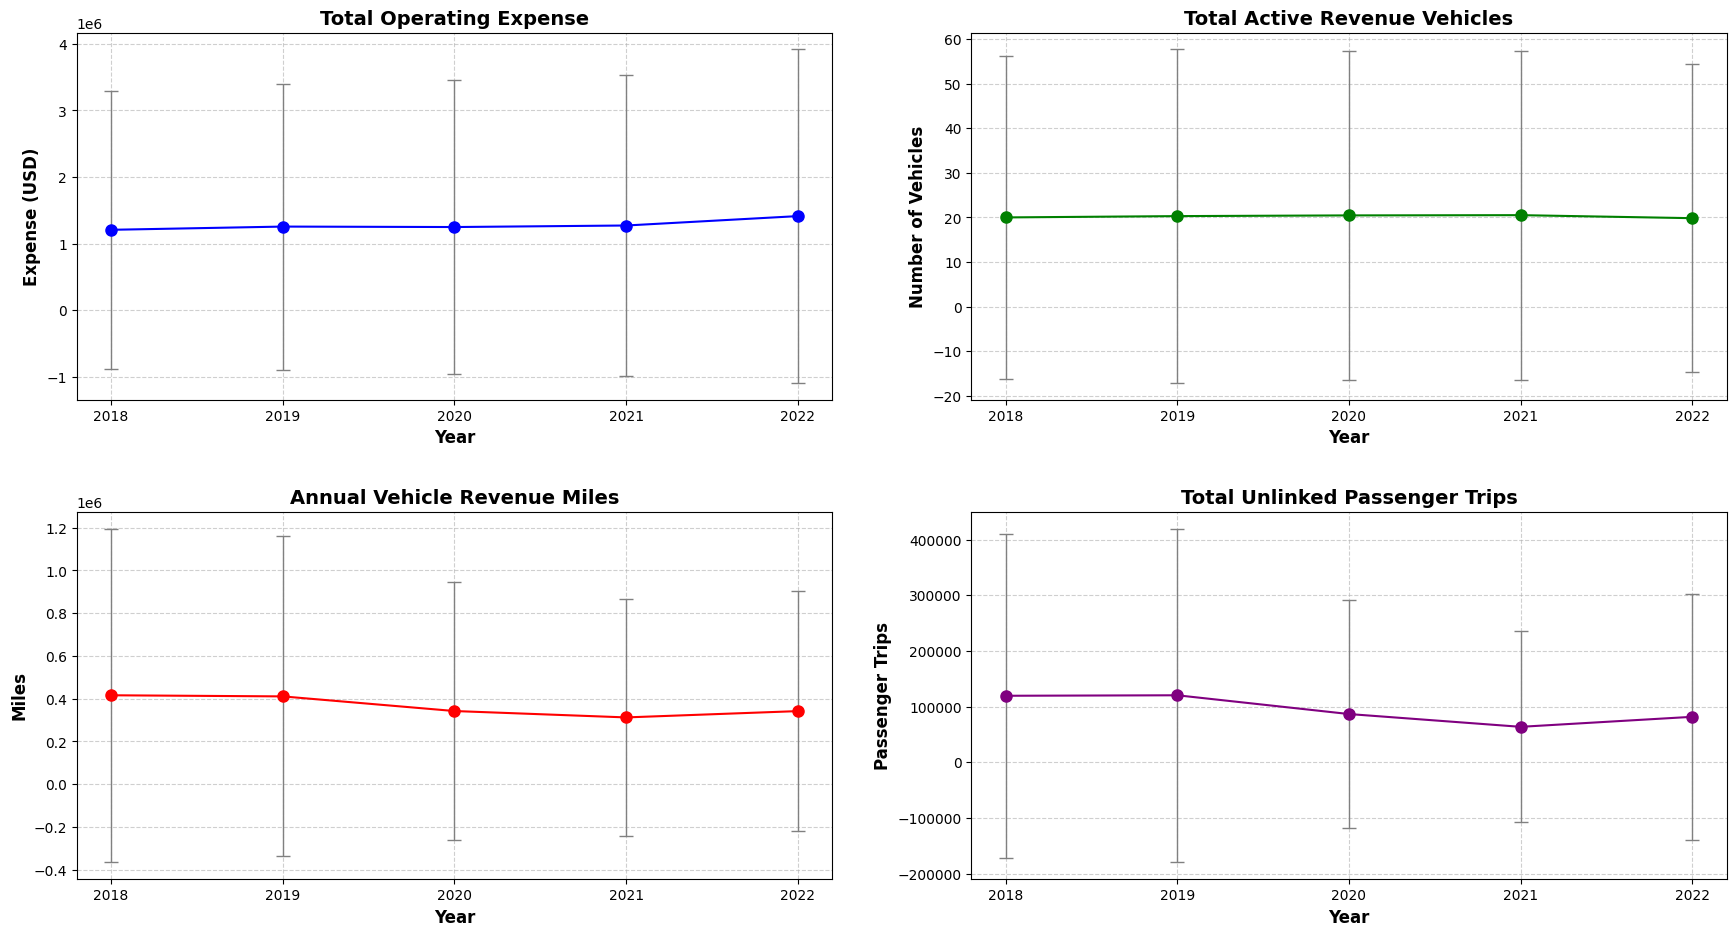

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'summary_stats' contains Yearly Mean and Std for variables
plt.figure(figsize=(18, 10))

# Plotting Mean and Std for Total Operating Expense
plt.subplot(2, 2, 1)
plt.errorbar(summary_stats['Year'], summary_stats['Mean_Operating_Expense'],
             yerr=summary_stats['Std_Operating_Expense'], fmt='o-', capsize=5, color='blue', markersize=8, ecolor='gray', elinewidth=1)
plt.title('Total Operating Expense', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Expense (USD)', fontweight='bold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(summary_stats['Year'], rotation=0)
# Plotting Mean and Std for Total Active Revenue Vehicles
plt.subplot(2, 2, 2)
plt.errorbar(summary_stats['Year'], summary_stats['Mean_Active_Revenue_Vehicles'],
             yerr=summary_stats['Std_Active_Revenue_Vehicles'], fmt='o-', capsize=5, color='green', markersize=8, ecolor='gray', elinewidth=1)
plt.title('Total Active Revenue Vehicles', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Number of Vehicles', fontweight='bold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(summary_stats['Year'], rotation=0)
# Plotting Mean and Std for Annual Vehicle Revenue Miles
plt.subplot(2, 2, 3)
plt.errorbar(summary_stats['Year'], summary_stats['Mean_Vehicle_Revenue_Miles'],
             yerr=summary_stats['Std_Vehicle_Revenue_Miles'], fmt='o-', capsize=5, color='red', markersize=8, ecolor='gray', elinewidth=1)
plt.title('Annual Vehicle Revenue Miles', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Miles', fontweight='bold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(summary_stats['Year'], rotation=0)
# Plotting Mean and Std for Total Unlinked Passenger Trips
plt.subplot(2, 2, 4)
plt.errorbar(summary_stats['Year'], summary_stats['Mean_Unlinked_Passenger_Trips'],
             yerr=summary_stats['Std_Unlinked_Passenger_Trips'], fmt='o-', capsize=5, color='purple', markersize=8, ecolor='gray', elinewidth=1)
plt.title('Total Unlinked Passenger Trips', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Passenger Trips', fontweight='bold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(summary_stats['Year'], rotation=0)
# Adjusting layout
plt.tight_layout(pad=3.0)
plt.savefig('Summary_Stats_Figure.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-38-e14f1941d749>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx, 1].set_xticklabels(state_yearly_stats['State'], fontweight='bold', fontsize=8)
<ipython-input-38-e14f1941d749>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx, 1].set_xticklabels(state_yearly_stats['State'], fontweight='bold', fontsize=8)
<ipython-input-38-e14f1941d749>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx, 1].set_xticklabels(state_yearly_stats['State'], fontweight='bold', fontsize=8)
<ipython-input-38-e14f1941d749>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx, 1].set_xticklabels(state_yearly_stats['State'], fontweight='bol

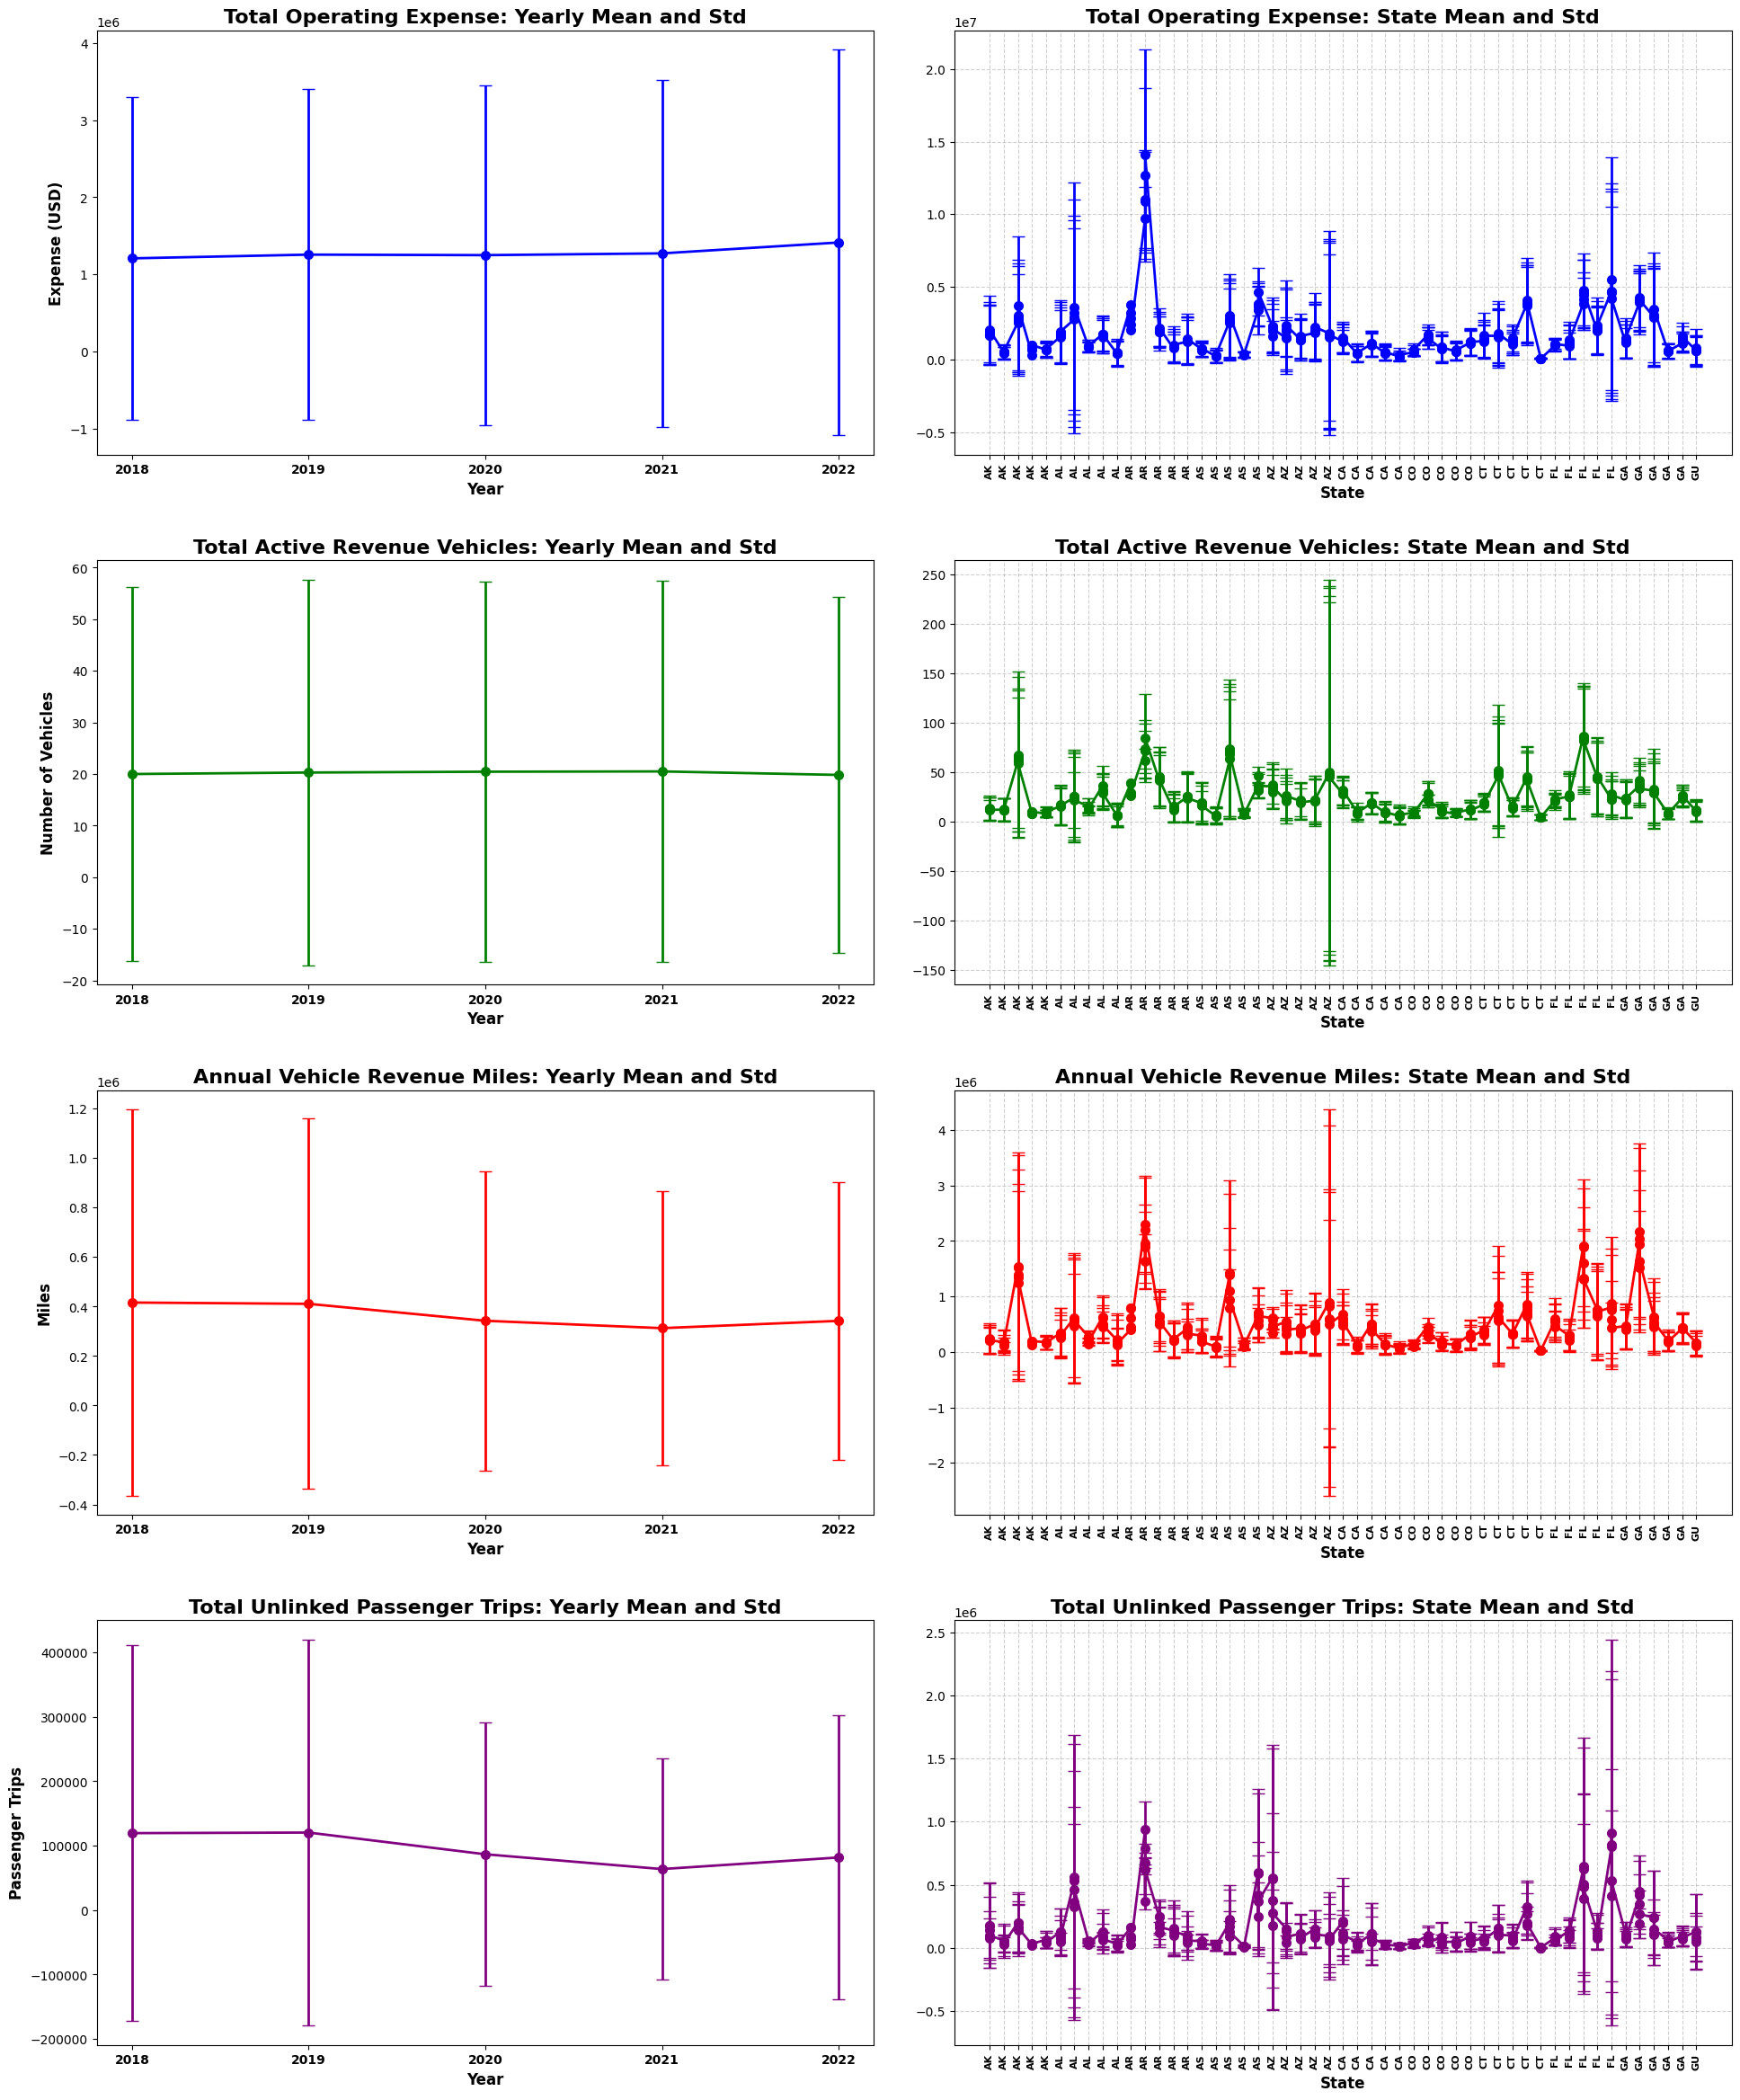

In [38]:
# Creating a single figure with subplots: 4 rows, 2 columns
fig, axs = plt.subplots(4, 2, figsize=(20, 24))

# Variables and their respective colors
variables = [
    ('Total Operating Expense', 'Expense (USD)', 'blue'),
    ('Total Active Revenue Vehicles', 'Number of Vehicles', 'green'),
    ('Annual Vehicle Revenue Miles', 'Miles', 'red'),
    ('Total Unlinked Passenger Trips', 'Passenger Trips', 'purple')
]

# Loop through each variable for both yearly and state-wise plots
for idx, (var, ylabel, color) in enumerate(variables):
    # Yearly Analysis (Left Column)
    axs[idx, 0].errorbar(df_summary['Year'], df_summary[(var, 'mean')],
                         yerr=df_summary[(var, 'std')], fmt='o-', capsize=5,
                         color=color, markersize=7, linewidth=2)
    axs[idx, 0].set_title(f'{var}: Yearly Mean and Std', fontweight='bold', fontsize=16)
    axs[idx, 0].set_xlabel('Year', fontweight='bold', fontsize=12)
    axs[idx, 0].set_ylabel(ylabel, fontweight='bold', fontsize=12)
    # Set ticks and labels for yearly plot
    axs[idx, 0].set_xticks([2018, 2019, 2020, 2021, 2022])
    axs[idx, 0].set_xticklabels([2018, 2019, 2020, 2021, 2022], fontweight='bold', fontsize=10)
    axs[idx, 0].tick_params(axis='y', labelsize=10, labelrotation=0)

    # State-wise Analysis (Right Column)
    axs[idx, 1].errorbar(state_yearly_stats['State'], state_yearly_stats[(var, 'mean')],
                         yerr=state_yearly_stats[(var, 'std')], fmt='o-', capsize=5,
                         color=color, markersize=7, linewidth=2)
    axs[idx, 1].set_title(f'{var}: State Mean and Std', fontweight='bold', fontsize=16)
    axs[idx, 1].set_xlabel('State', fontweight='bold', fontsize=12)
    # axs[idx, 1].set_ylabel(ylabel, fontweight='bold', fontsize=12)
    axs[idx, 1].grid(True, linestyle='--', alpha=0.6)
    axs[idx, 1].tick_params(axis='x', labelsize=10, labelrotation=90)
    axs[idx, 1].set_xticklabels(state_yearly_stats['State'], fontweight='bold', fontsize=8)

# Adjust layout for clarity
plt.tight_layout(pad=3.0)
plt.show()

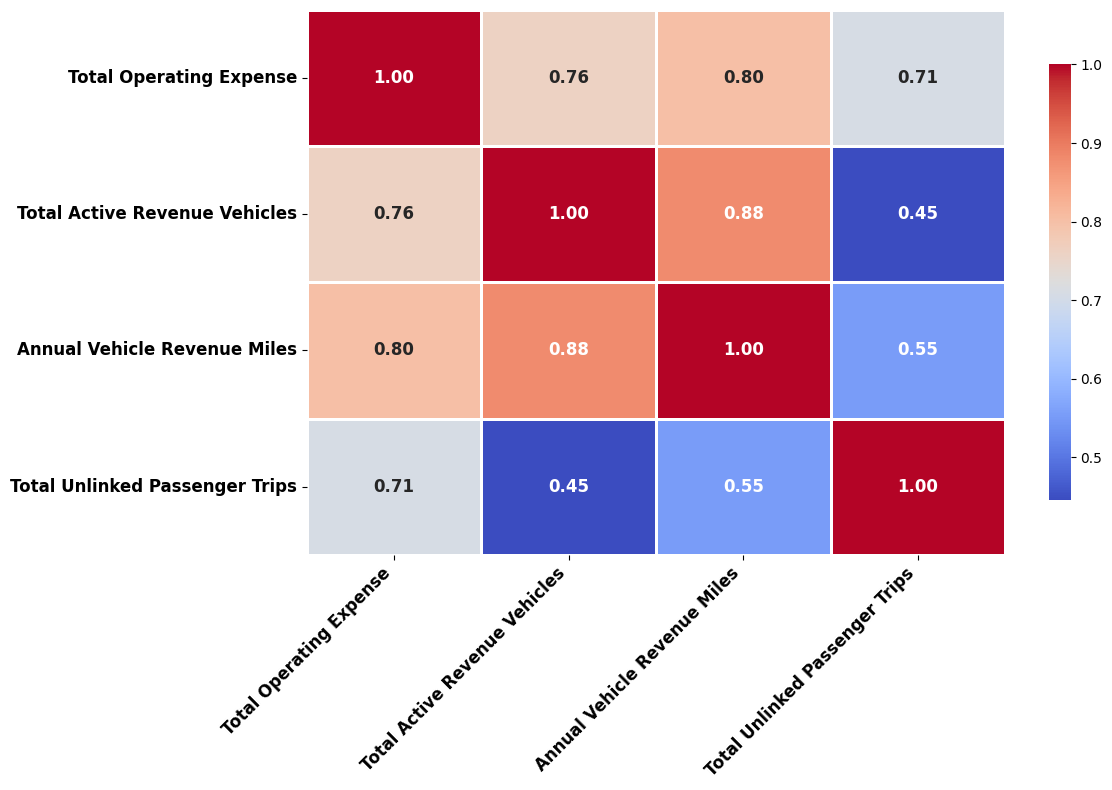

In [40]:
# Improved heatmap for a scientific paper
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.8,
            annot_kws={"size":12, "fontweight": "bold"}, cbar_kws={"shrink": 0.8})

# Enhance x-axis and y-axis label formatting
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')  # Adjust rotation and font
plt.yticks(fontsize=12, fontweight='bold')  # Bold font for y-axis labels

# Add title for clarity
# plt.title("Correlation Matrix of Operational Metrics", fontsize=14, fontweight='bold', pad=20)

# Improve layout
plt.tight_layout()
plt.show()